## Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Importing Data

In [2]:
df = pd.read_csv("./Data/Leads.csv")

In [3]:
df.head().T

,0,1,2,3,4
Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
Lead Number,660737,660728,660727,660719,660681
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Do Not Call,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0


In [4]:
df.shape

(9240, 37)

In [5]:
for i in df.columns:
    print(i,df[i].nunique())

Prospect ID 9240
Lead Number 9240
Lead Origin 5
Lead Source 21
Do Not Email 2
Do Not Call 2
Converted 2
TotalVisits 41
Total Time Spent on Website 1731
Page Views Per Visit 114
Last Activity 17
Country 38
Specialization 19
How did you hear about X Education 10
What is your current occupation 6
What matters most to you in choosing a course 3
Search 2
Magazine 1
Newspaper Article 2
X Education Forums 2
Newspaper 2
Digital Advertisement 2
Through Recommendations 2
Receive More Updates About Our Courses 1
Tags 26
Lead Quality 5
Update me on Supply Chain Content 1
Get updates on DM Content 1
Lead Profile 6
City 7
Asymmetrique Activity Index 3
Asymmetrique Profile Index 3
Asymmetrique Activity Score 12
Asymmetrique Profile Score 10
I agree to pay the amount through cheque 1
A free copy of Mastering The Interview 2
Last Notable Activity 16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Summary Stats of the data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Prospect Id is the unique ID from which the customers are getting identified.
# So first we will check if is there any duplicate values present or not.

duplicate_prospect_id = df.duplicated(subset = 'Prospect ID')
print(f'There are {sum(duplicate_prospect_id == True)} duplicate values in Prospect ID.')


# Lead Number is the unique ID from which the customers are getting identified.
duplicate_lead_num = df.duplicated(subset = 'Lead Number')
print(f"There are {sum(duplicate_lead_num == True)} duplicate values in Lead Number.")

There are 0 duplicate values in Prospect ID.
There are 0 duplicate values in Lead Number.


1. As we can see there are no duplicate values present in both the columns.
2. From above analysis we can say that all the data present is of individual customers withou any repetation.
3. So we are free to drop those two columns i.e `Prospect ID`and`Lead Number` as they will not provide any further insights.


## EDA 

In [9]:
# Dropping both the columns from the dataset

df.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [10]:
df.isnull().sum().sum()

41039

In [11]:
# Calculating the missing values and the percentage of missing values
missing_value = df.isnull().sum() # .sort_values(ascending = False)
missing_percent = round(df.isnull().sum() / len(df) * 100, 2)

# Combining the above result into a single dataframe.
null_values_df = pd.concat([missing_value, missing_percent], axis = 1)

# Rename the columns
null_values_df.columns = ['Missing_Sum', 'Missing_Percent']
null_values_df.sort_values(by = ['Missing_Percent'],ascending = True)

,Missing_Sum,Missing_Percent
Lead Origin,0,0.00
I agree to pay the amount through cheque,0,0.00
Get updates on DM Content,0,0.00
Update me on Supply Chain Content,0,0.00
Receive More Updates About Our Courses,0,0.00
Through Recommendations,0,0.00
Digital Advertisement,0,0.00
Newspaper,0,0.00
A free copy of Mastering The Interview,0,0.00
Newspaper Article,0,0.00


In [12]:
# The categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value 
# Counting the numbers of columns with 'Select' in their unique values.

# for col in df.columns:
#     if df[col].isin(['Select']).any():
#         print(col)
#         print(df[col].value_counts(), "\n")


select_columns = df.apply(lambda col: col.value_counts().get("Select", 0) > 0)
print(select_columns[select_columns].index.tolist())

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


From analysis, we get to know that the above columns contain `Select` Variable inside it.<br>
So first we will change the Select variable into a NaN valriable to do the further analysis.

In [13]:
df.replace('Select', np.nan, inplace = True)

In [14]:
df.isnull().sum().sum()

54419

In [15]:
54419 - 41039

13380

From analysis we get to know that there are almost 13380 more nan values in the dataset so we will check once again how many % increase in the nan values in each columns.

In [16]:
# Calculating the missing values and the percentage of missing values
missing_value = df.isnull().sum() # .sort_values(ascending = False)
missing_percent = round(df.isnull().sum() / len(df) * 100, 2)

# Combining the above result into a single dataframe.
null_values_df = pd.concat([missing_value, missing_percent], axis = 1)

# Rename the columns
null_values_df.columns = ['Missing_Sum', 'Missing_Percent']
null_values_df.sort_values(by = ['Missing_Percent'],ascending = True)

,Missing_Sum,Missing_Percent
Lead Origin,0,0.00
I agree to pay the amount through cheque,0,0.00
Get updates on DM Content,0,0.00
Update me on Supply Chain Content,0,0.00
Receive More Updates About Our Courses,0,0.00
Through Recommendations,0,0.00
Digital Advertisement,0,0.00
Newspaper,0,0.00
A free copy of Mastering The Interview,0,0.00
Newspaper Article,0,0.00


In [17]:
# We will take the threshold of 45% and drop all the NaN values columns who are having more than 45% nan Values.
col = missing_percent[missing_percent <= 45].index

In [18]:
df = df[col]
df.head().T

,0,1,2,3,4
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Do Not Call,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0
Last Activity,Page Visited on Website,Email Opened,Email Opened,Unreachable,Converted to Lead
Country,NaN,India,India,India,India


In [19]:
# Let's check the null ration after removing the columns which have more than 45% on null values in it.
round(df.isnull().sum()/len(df) * 100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

# EDA on Categorical Variables

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [21]:
# From above analysis we can see the `Country` columns is having almost 27% of null values in it.
# Now lets analyse the Country Column

df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

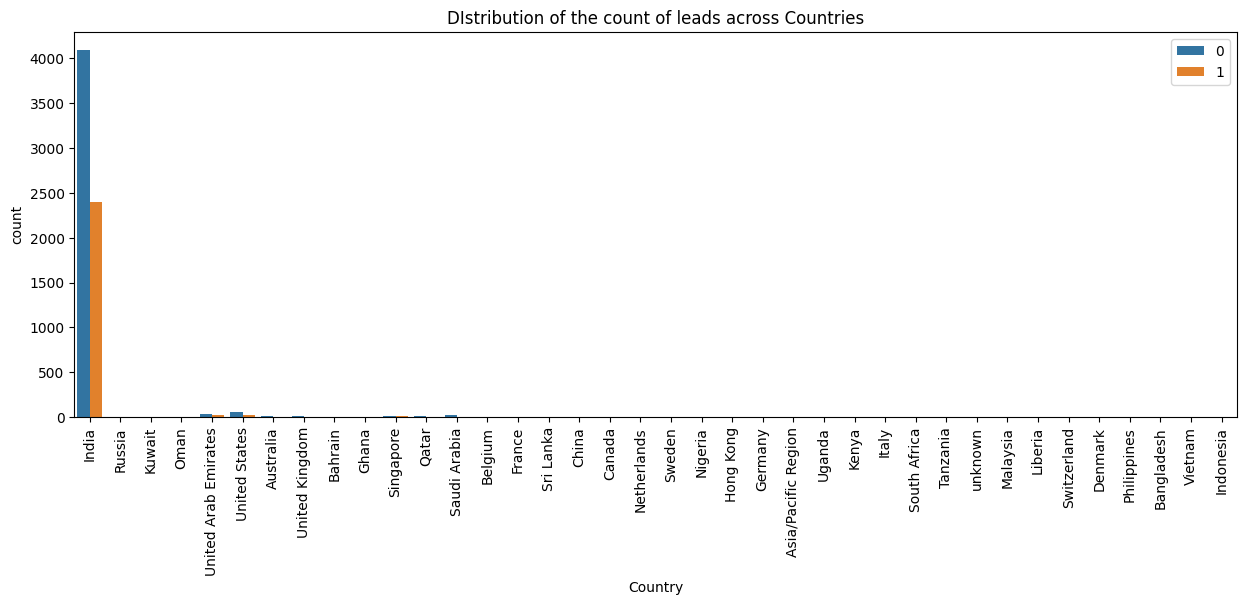

In [22]:
# Visualizing the Country Column

plt.figure(figsize=(15,5))

# Visualing the count plot
count_fig = sns.countplot(x = df.Country, hue = df.Converted)
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation = 90)

plt.title("DIstribution of the count of leads across Countries")
plt.legend(loc = 1)
plt.show()

In [23]:
# Checking the most frequent County in the country Column
df['Country'].mode()

0    India
Name: Country, dtype: object

From above we can understand that India is the most occuring country in the country column.<br>
Hence we can replace null values with India.

In [24]:
df['Country'] = df['Country'].replace(np.nan, "India")

In [25]:
# Let's check the values counts after imputing the null values.

df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

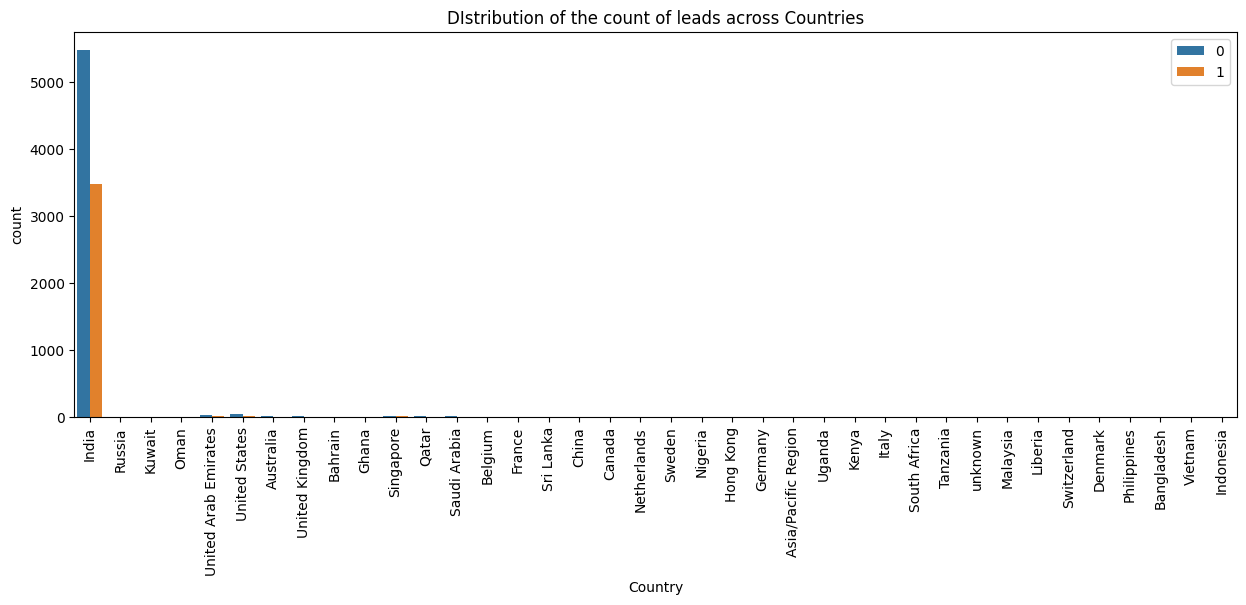

In [26]:
# Visualizing the Country Column after Replacing the Null values.

plt.figure(figsize=(15,5))

# Visualing the count plot
count_fig = sns.countplot(x = df.Country, hue = df.Converted)
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation = 90)

plt.title("DIstribution of the count of leads across Countries")
plt.legend(loc = 1)
plt.show()

Since `India` is tagged as the most occuring Country, it may not be suitable for an analysis espicially for a classification problem. Hence we can remove the Country column inorder to escape from the bias.

In [27]:
df.drop('Country', axis = 1, inplace = True)

In [28]:
# Let's check if the country column is present or not.
'Country' in df.columns

False

In [29]:
# Checking the City Column

df['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
df['City'].mode()

0    Mumbai
Name: City, dtype: object

Mumbai has been tagged as the most frequently occuring value. Hence we impute Null values with Mumbai.

In [31]:
df['City'] = df['City'].replace(np.nan, "Mumbai")

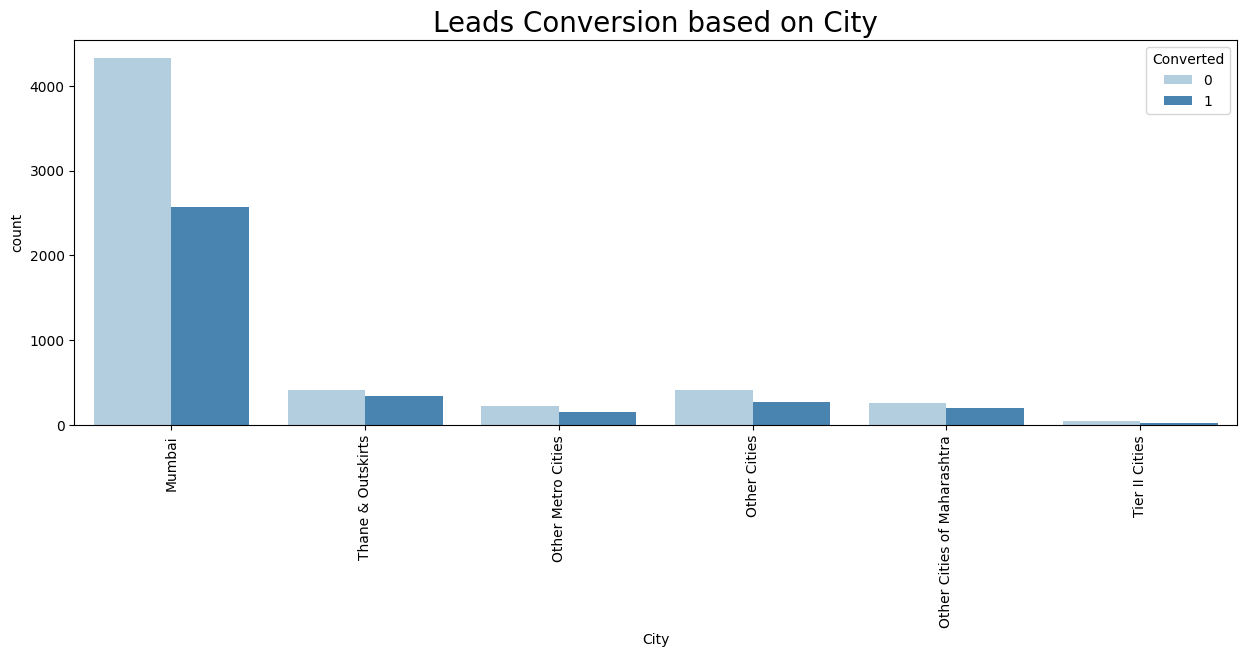

In [32]:
#Visuaising the City columnn after amending Null values

plt.figure(figsize=(15,5))

#Visualising using Countplot
count_fig=sns.countplot(x = df["City"], hue= df['Converted'],palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the figure
plt.title("Leads Conversion based on City",fontsize=20)
plt.show()

Similar to the previous analysis we can confirm that Mumbai is the most occuring city.

In [33]:
# Checking Specialization Column.

df['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- There seems to be a scenario in the variable.
- Some customer may not have mentioned specialization as it wa not in the list or there aren't any.
- Hence we can impute the NA's as Not Specified.

In [34]:
df['Specialization'] = df.Specialization.replace(np.nan, 'Not Specified')

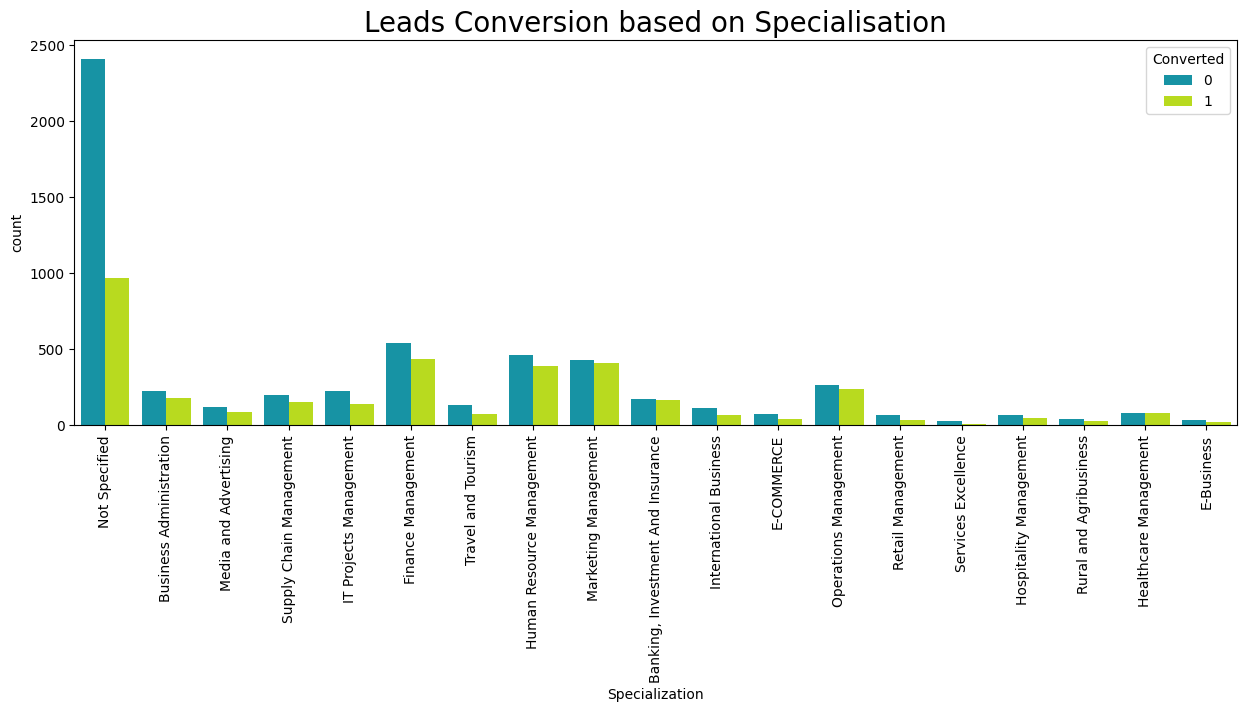

In [35]:
#plotting spread of Specialization columnn 

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot( x = df['Specialization'], hue=df['Converted'],palette='nipy_spectral')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Specialisation",fontsize=20)
plt.show()

Insights: **Management** has the higher number of leads converted. This is important and should not be removed.

In [36]:
# Extracting all the Management values from the Specialization columns.
management = [index for index in df['Specialization'].value_counts().index if 'Management' in index]
management

['Finance Management',
 'Human Resource Management',
 'Marketing Management',
 'Operations Management',
 'IT Projects Management',
 'Supply Chain Management',
 'Healthcare Management',
 'Hospitality Management',
 'Retail Management']

In [37]:
# Replacing all the management values with management_specializations.
df['Specialization'] = df['Specialization'].replace(management, 'Management_Specializations')

In [38]:
df['Specialization'].value_counts()

Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

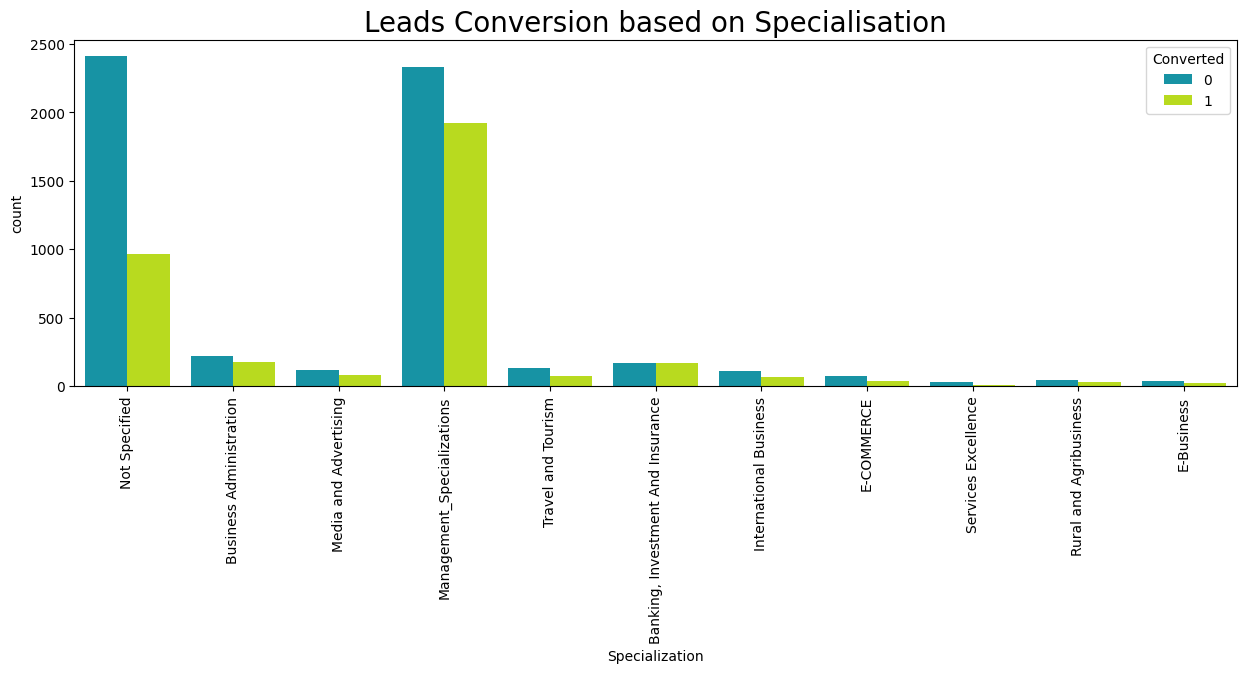

In [39]:
# Plotting Specialization column after consolidationg the Management SPecializations

plt.figure(figsize=(15,4.5))

count_fig = sns.countplot(x = df['Specialization'], hue = df['Converted'], palette='nipy_spectral')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Specialisation",fontsize=20)
plt.show()

In [40]:
df.isnull().sum().sort_values(ascending = False)

Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Digital Advertisement                               0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Magazine                                            0
Newspaper                                           0
X Education Forums          

Checking `What is your current occupation` as it has the most null values in the above info.<br>
Looking for value counts inside the Occupation.

In [41]:
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since we have most of the Occupations listed under the Occupations Columns and we can still find NA values, we can impute NA's with `Unemployed`

In [42]:
# Replacing Null values with "Unemployed"
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [43]:
# Checking the value counts after the imputation.
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

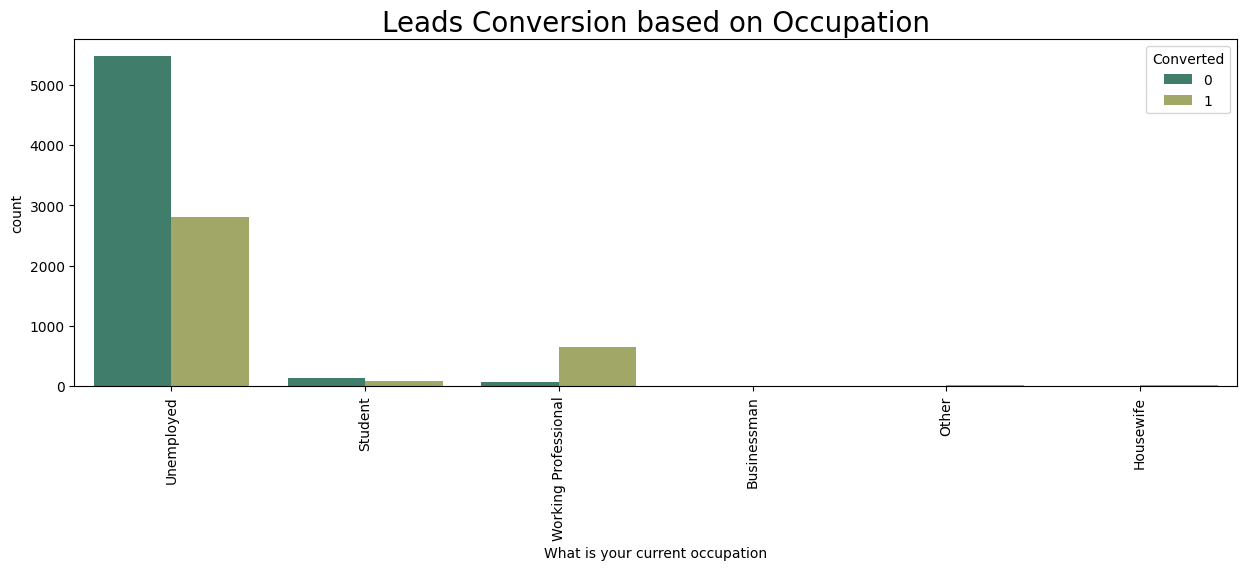

In [44]:
#Visualizing the Employment Variable

#Setting the frame
plt.figure(figsize=(15,4.5))

#Visualising using Countplot

count_fig=sns.countplot(x = df['What is your current occupation'], hue= df['Converted'],palette='gist_earth')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Occupation",fontsize=20)
plt.show()

In [45]:
# Ratio of categories after imputation
df['What is your current occupation'].value_counts(normalize = True) * 100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

From the boave analysis, we can understand:
- Chances are high for working professionals going for the courses.
- Unemployed lead are the most in the leads.
- Housewives, Businessman, Student and Other Categories may not be converted to join the course.


In [46]:
df.isna().sum().sort_values(ascending = False)

Tags                                             3353
What matters most to you in choosing a course    2709
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Newspaper                                           0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Magazine                                            0
X Education Forums                                  0
Newspaper Article           

In [47]:
# Let's check the variable `What matters most to you in choosing a course`
df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [48]:
# Replacing the NaN values with "Better Career Prospects" as most of them will be enrolling for the program for better career
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

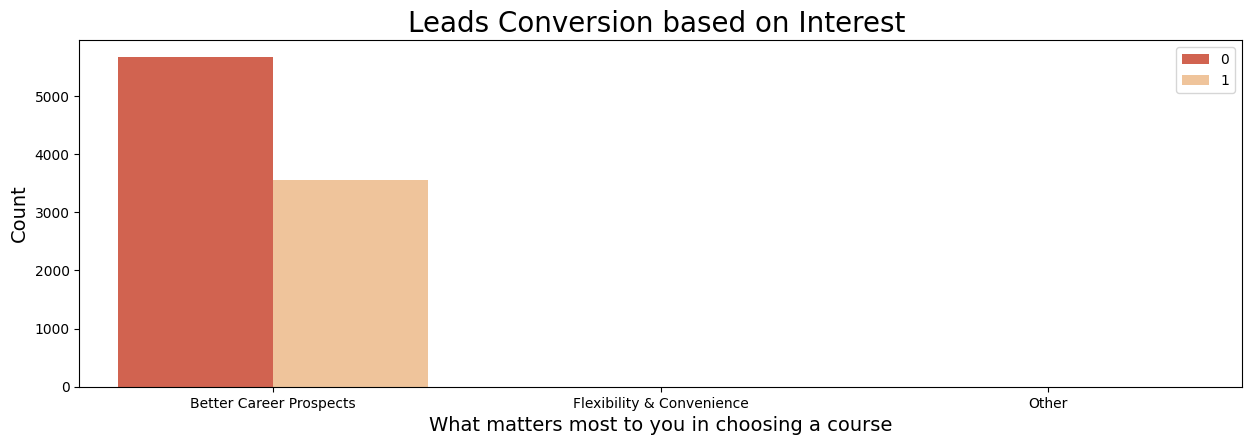

In [49]:
#visualizing Variable "What matters most to you in choosing a course

#Setting the frame
plt.figure(figsize=(15,4.5))

#Visualising using Countplot

count_fig=sns.countplot(x = df['What matters most to you in choosing a course'], hue=df['Converted'],palette='OrRd_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Leads Conversion based on Interest ",fontsize=20)
plt.xlabel("What matters most to you in choosing a course", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

In [50]:
# Let's check the ratio of it.
df['What matters most to you in choosing a course'].value_counts(normalize = True) * 100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

Since "Better Career Prospects" influences the column drastically, we can remove that column as it will create bias.

In [51]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [52]:
df.isnull().sum().sort_values(ascending = False)

Tags                                        3353
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Lead Origin                                    0
Newspaper                                      0
A free copy of Mastering The Interview         0
I agree to pay the amount through cheque       0
City                                           0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Newspaper Article                              0
X Education Forums                             0
Magazine                                       0
Search                                         0
What is your current occupation                0
Specialization      

In [53]:
df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Since the leads has not confirmed on the tag, we can impute Null values as "Not Specified".

In [54]:
# Replacing the NaN values of Tags with "Not Specified"

df['Tags'] = df['Tags'].replace(np.nan, "Not Specified")

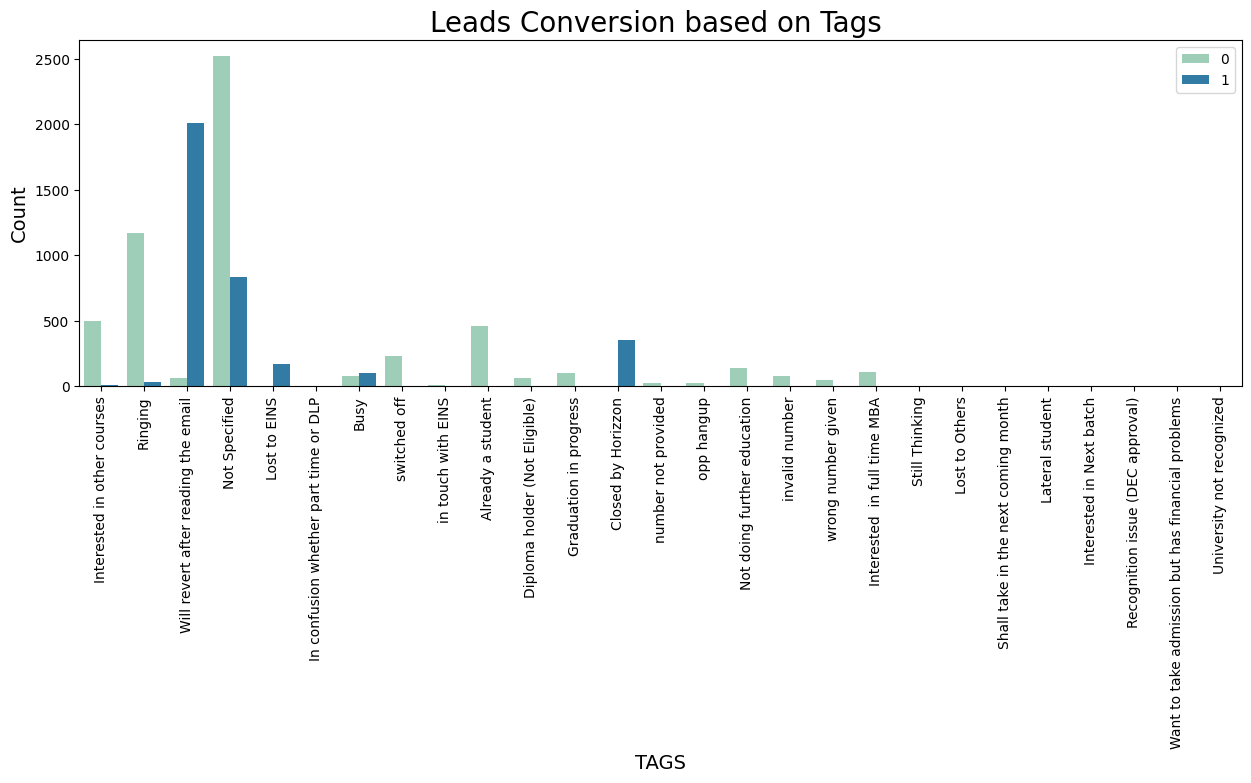

In [55]:
#Countplot on Tag variable

#Setting the frame
plt.figure(figsize=(15,4.5))

#Visualising using Countplot

count_fig=sns.countplot(x = df['Tags'], hue = df['Converted'],palette='YlGnBu')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Tags ",fontsize=20)
plt.xlabel("TAGS", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

In [56]:
df['Tags'].value_counts(ascending = False)

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [57]:
tags = df['Tags'].value_counts(ascending = False)
tags_less_than_145 = tags[tags <= 145].index.tolist()
tags_less_than_145

['Not doing further education',
 'Interested  in full time MBA',
 'Graduation in progress',
 'invalid number',
 'Diploma holder (Not Eligible)',
 'wrong number given',
 'opp hangup',
 'number not provided',
 'in touch with EINS',
 'Lost to Others',
 'Still Thinking',
 'Want to take admission but has financial problems',
 'In confusion whether part time or DLP',
 'Interested in Next batch',
 'Lateral student',
 'Shall take in the next coming month',
 'University not recognized',
 'Recognition issue (DEC approval)']

In [58]:
# Adding 2 more variables in the tags_less_than_145
tags_to_replace = tags_less_than_145 + ["switched off","Already a student"]

# Since some tags have very minimal values, we can replace them as "Other Tags"
df['Tags'] = df['Tags'].replace(tags_to_replace, "Other_Tags")

In [59]:
df['Tags'].value_counts()

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [60]:
# Checking the null values again
df.isnull().sum().sort_values(ascending = False) 

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
Lead Origin                                   0
Newspaper                                     0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
City                                          0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Tags                                          0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper Article                             0
X Education Forums                            0
Magazine                                      0
Search                                        0
What is your current occupation               0
Specialization                          

In [61]:
df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Since Lead Source has very less null values, we can replace Null as Others.

In [62]:
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Others')

In [63]:
# Now we will combine low frequency values present in the lead Source.
df['Lead Source'] = df['Lead Source'].replace({'google': 'Google', 
                                               'Facebook' : 'Social Media',}).replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'], "Others")

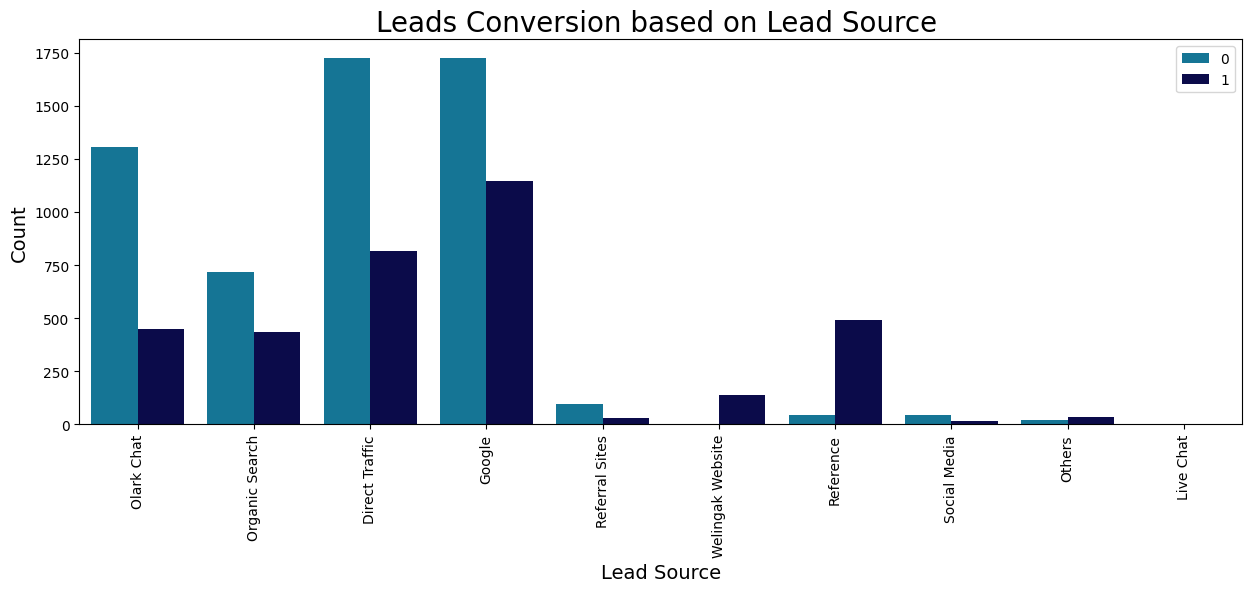

In [64]:
#Countplot on Lead Source variable

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(x = df['Lead Source'], hue= df['Converted'],palette='ocean_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Lead Source ",fontsize=20)
plt.xlabel("Lead Source", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

Analysis:
- Most of the leads generated are through Google and Direct traggif and the least trhough Live Chat.
- Welingak website has the most conversion rate.
- Lead conversion can be improved by maximising leads from Reference and welingak website.
- Focussing Olark chat, Organic search, Direct traffic, and google leads may increase the lead conversion.

In [65]:
# Checking last Activity variable
df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [66]:
# Checking the ration of categories
df['Last Activity'].value_counts(dropna = False, normalize = True) * 100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [67]:
# Converting Nill values to 'Others'
df['Last Activity'] = df['Last Activity'].replace(np.nan, "Others")

In [68]:
# Alos replacing the categories which are less than 1% to others as it does not make much impact for analysis.
last_activity_counts = (df['Last Activity'].value_counts(dropna = False, normalize = True) * 100)
less_than_1per = last_activity_counts[last_activity_counts <= 1.1].index.tolist()

df['Last Activity'] = df['Last Activity'].replace(less_than_1per, "Others")

In [69]:
# Checking the values of the Last Activity Variable.
df['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [70]:
round(df.isnull().sum() / len(df) * 100,2).sort_values(ascending = False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Lead Origin                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Newspaper Article                           0.00
Lead Source                                 0.00
Magazine                                    0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity       

Since we are having the total NA's less than 2%, we can remove the rows as it will not have effect on the model.

In [71]:
# Dropping NA Values.
df.dropna(inplace = True)

In [72]:
# Now once again we will check the ratio on null values.
round(df.isnull().sum() / len(df) * 100,2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [73]:
# Checking the Lead Origin variable.
df['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

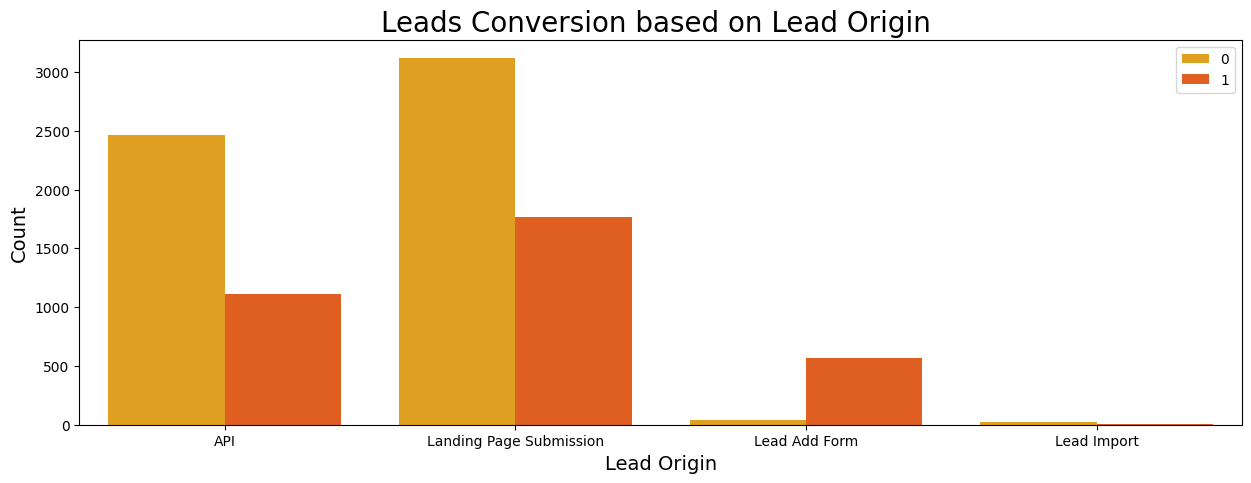

In [74]:
# visualizing count of Variable based on Converted value

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(x = df['Lead Origin'], hue= df['Converted'],palette='autumn_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Leads Conversion based on Lead Origin ",fontsize=20)
plt.xlabel("Lead Origin", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

Analysis:
- API and Landing Page Submission bring more nu,ber of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads asr not very high.
- If lead add form could get more leads, then the rate of conversion can be very high and for overall growth.

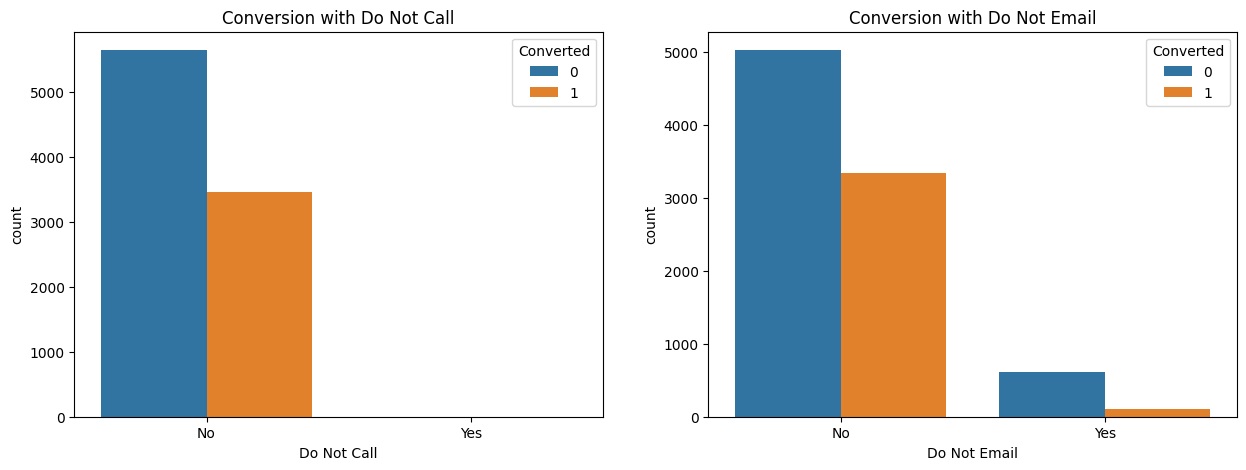

In [75]:
# Checking the variables Do not Email & do not call using a Subplots.
plt.figure(figsize = (15,5))

ax1 = plt.subplot(1,2,1)
ax1 = sns.countplot(x = df['Do Not Call'], hue = df['Converted'])
plt.title("Conversion with Do Not Call")

ax2 = plt.subplot(1,2,2)
ax2 = sns.countplot(x = df['Do Not Email'], hue = df['Converted'])
plt.title("Conversion with Do Not Email")
plt.show()

In [76]:
# Evaluating value counts for Do Not Call Variable.
df['Do Not Call'].value_counts(dropna = False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

Since Do Not Call has No as most occuring category it will create bias. So we can remove this from data.

In [77]:
# Dropping the Do Not Call Column
df.drop(['Do Not Call'], axis = 1, inplace = True)

In [78]:
df['Do Not Email'].value_counts(dropna = False, normalize = True) * 100

No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64

# Checking for categorical variables if they can be dropped.

In [79]:
df.dtypes

Lead Origin                                  object
Lead Source                                  object
Do Not Email                                 object
Converted                                     int64
TotalVisits                                 float64
Total Time Spent on Website                   int64
Page Views Per Visit                        float64
Last Activity                                object
Specialization                               object
What is your current occupation              object
Search                                       object
Magazine                                     object
Newspaper Article                            object
X Education Forums                           object
Newspaper                                    object
Digital Advertisement                        object
Through Recommendations                      object
Receive More Updates About Our Courses       object
Tags                                         object
Update me on

In [80]:
check_cat_var = (['Search', "Magazine", "Newspaper Article", "X Education Forums", 
                  "Newspaper", "Digital Advertisement", "Through Recommendations", 
                  "Receive More Updates About Our Courses", "Update me on Supply Chain Content", 
                  "Get updates on DM Content", "I agree to pay the amount through cheque"])

for i in check_cat_var:
    print(i)
    print(df[i].value_counts(dropna = False))
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - ")

Search
No     9089
Yes      14
Name: Search, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - 
Magazine
No    9103
Name: Magazine, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - 
Newspaper Article
No     9101
Yes       2
Name: Newspaper Article, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - 
X Education Forums
No     9102
Yes       1
Name: X Education Forums, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - 
Newspaper
No     9102
Yes       1
Name: Newspaper, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - 
Digital Advertisement
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - 
Through Recommendations
No     9096
Yes       7
Name: Through Recommendations, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - 
Receive More Updates About Our Courses
No    9103
Name: Receive More Updates About Our Courses, dtype: int64
- - - -

In [81]:
df.shape

(9103, 25)

From the above we can understand that the variables listed under cols_to_drop can be dropped.

In [82]:
df.drop(check_cat_var, axis = 1, inplace = True)

In [83]:
# Checking values counts of last Notable Activity.
df['Last Notable Activity'].value_counts() 

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [84]:
la_notab_act = df['Last Notable Activity'].value_counts()
la_notable_act_1per = la_notab_act[la_notab_act <= 14].index.tolist()
la_notable_act_1per

['Had a Phone Conversation',
 'Email Marked Spam',
 'Approached upfront',
 'Resubscribed to emails',
 'View in browser link Clicked',
 'Form Submitted on Website',
 'Email Received']

In [85]:
# We can consolidate the categories that has less than 1% occurance on the Last Notable Activity.

df['Last Notable Activity'] = df['Last Notable Activity'].replace(la_notable_act_1per, 'Other_Notable_Activity')

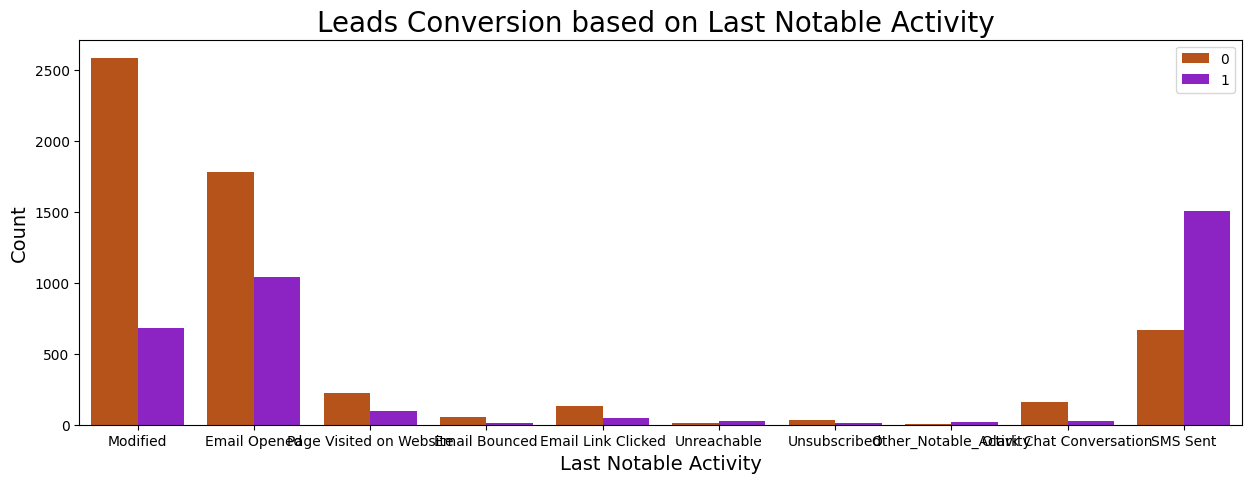

In [86]:
#visualizing count of Variable based on Converted value

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(x = df['Last Notable Activity'], hue= df['Converted'],palette='gnuplot_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Leads Conversion based on Last Notable Activity ",fontsize=20)
plt.xlabel("Last Notable Activity", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

Analysis:
- SMS sent has more conversion than any of the activity.
- Seems Modified has the least conversion ratio.
- Also, Other Notable Activity also has almost very signifiable reason for conversion

In [87]:
# Count of categories under Last Notable Activity.
df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
Unsubscribed                 47
Unreachable                  32
Other_Notable_Activity       21
Name: Last Notable Activity, dtype: int64

In [88]:
# Checking the ration of the Notable Activity
df['Last Notable Activity'].value_counts(normalize = True) * 100

Modified                   35.922223
Email Opened               31.055696
SMS Sent                   23.860266
Page Visited on Website     3.493354
Olark Chat Conversation     2.010326
Email Link Clicked          1.900472
Email Bounced               0.659123
Unsubscribed                0.516313
Unreachable                 0.351532
Other_Notable_Activity      0.230693
Name: Last Notable Activity, dtype: float64

In [89]:
# Let's check the data once again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

# Analysis on Numerical Variables

**Converted Column**

In [90]:
df['Converted'].value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [91]:
df['Converted'].value_counts(normalize = True) * 100

0    61.979567
1    38.020433
Name: Converted, dtype: float64

From the above analysis we can see that the conversion rate is 38%.

### Analysing the numerical variables on Correlation using a heatmap.

In [92]:
# excluding object data types to check the correlation on all int columns with target col
int_col = df.select_dtypes(exclude = 'object')

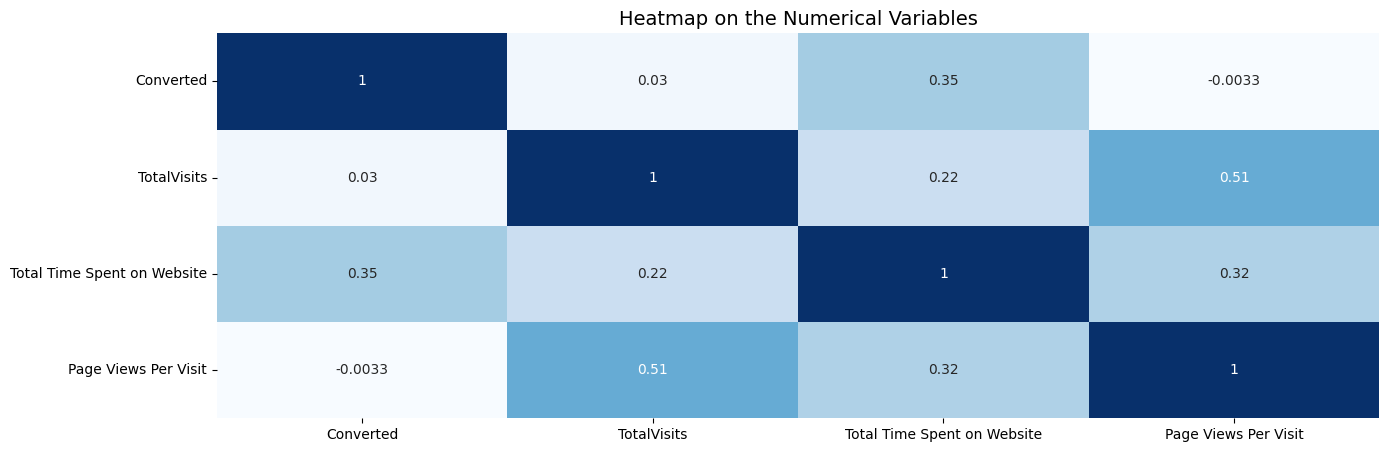

In [93]:
plt.figure(figsize = (15,5))

# Heatmap
sns.heatmap(int_col.corr(), cmap = "Blues", annot = True, cbar = False)
plt.title("Heatmap on the Numerical Variables", fontsize = 14)
plt.show()

### Let's us analyse the Numerical Variables with Boxplots.

In [94]:
# Analysing the Total Time Spent on Website Variable.
df['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [95]:
df.shape

(9103, 14)

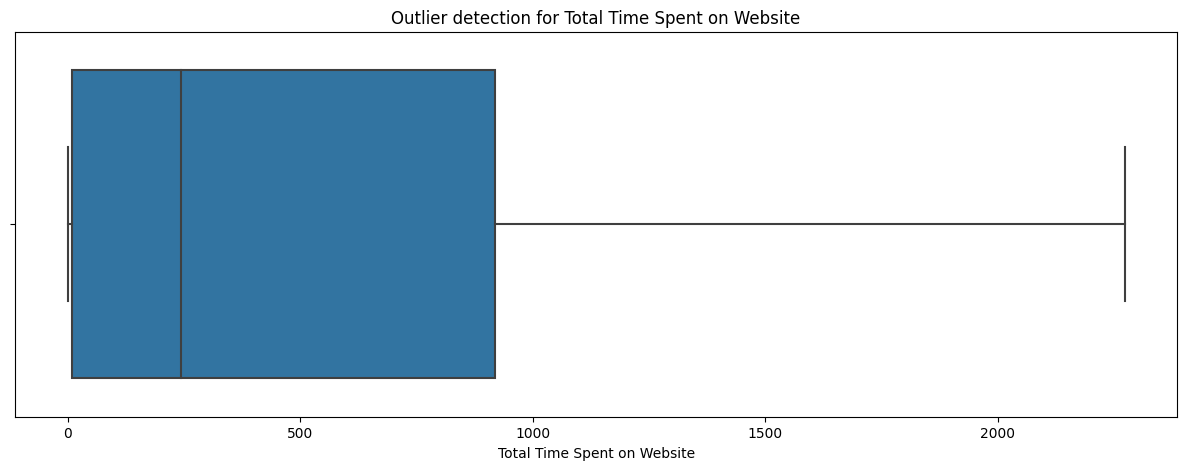

Median of `Total Time Spent on Website` is: 244.0


In [96]:
# Outlier Detection 
plt.figure(figsize = (15,5))

sns.boxplot(x = df['Total Time Spent on Website'])

plt.title("Outlier detection for Total Time Spent on Website")
plt.show()

print(f"Median of `Total Time Spent on Website` is: {df['Total Time Spent on Website'].median()}")

We can see that there are not any outliers present for the `Total Time Spent of the Website`, hence no action required for this variable.

In [97]:
# Analysis on Total Visits.
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

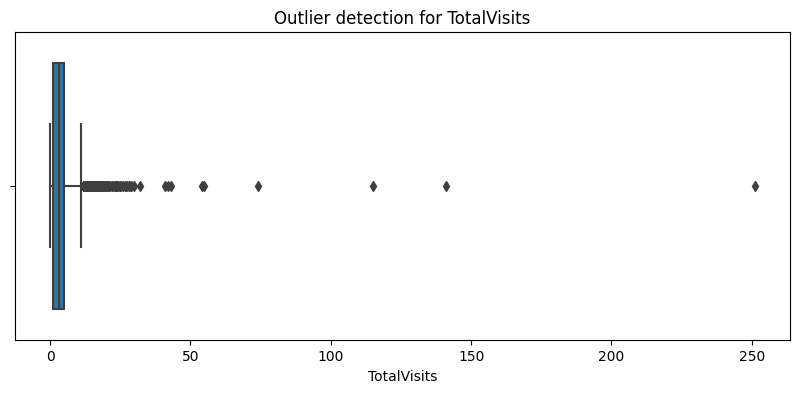

Median of TotalVisits is 3.0


In [98]:
plt.figure(figsize=(10,4))

sns.boxplot(x = df['TotalVisits'])

## Formatting the figure
plt.title('Outlier detection for TotalVisits')
plt.show()

print ('Median of TotalVisits is', df['TotalVisits'].median())

We can see that there are some outliers are present in the `TotalVisits` so first we have to deal with those outliers.

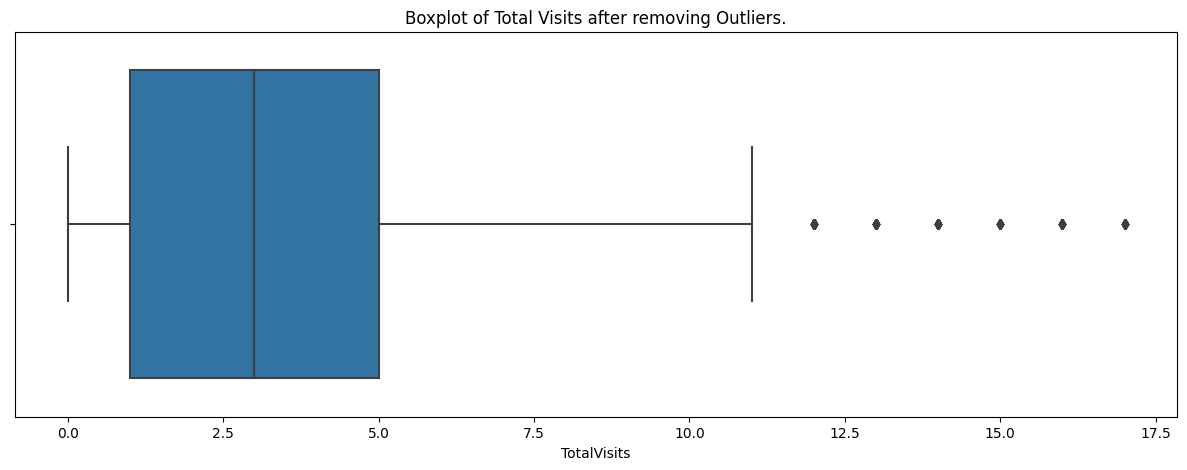

In [99]:
# Removing the outliers 
plt.figure(figsize=(15,5))

Q3 = df['TotalVisits'].quantile(0.99)

df = df[(df['TotalVisits'] <= Q3)]

Q1 = df['TotalVisits'].quantile(0.01)

df = df[(df['TotalVisits'] >= Q1)]


sns.boxplot(x = df['TotalVisits'])
plt.title("Boxplot of Total Visits after removing Outliers.")
plt.show()

In [100]:
# Checking the shape of dataset
df.shape

(9020, 14)

In [101]:
print(f" After removing outliers we have dropped the {9103 - 9020} datapoints.")

 After removing outliers we have dropped the 83 datapoints.


In [102]:
# Analysing Page Views Per Visit
df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

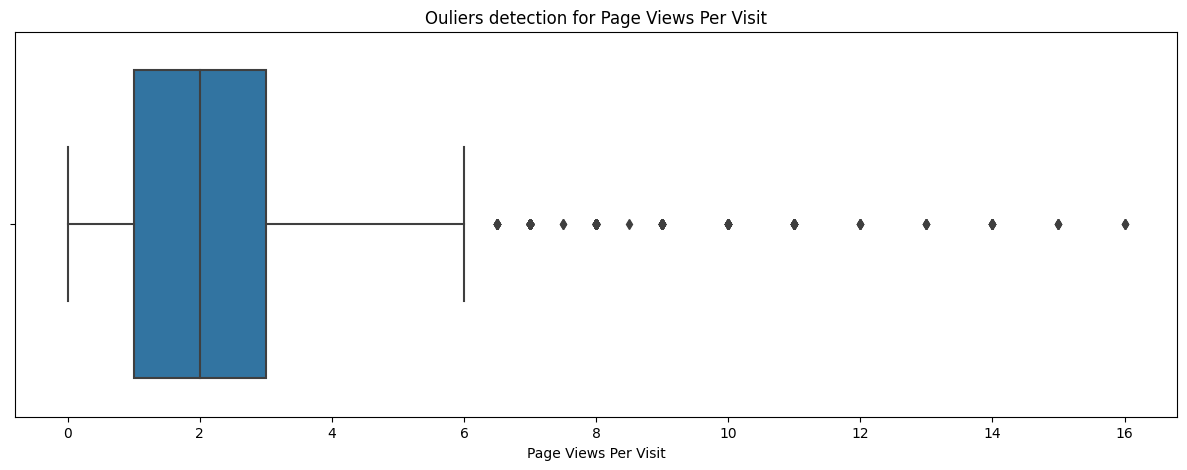

Median of `Pages Views Per Visit is`: 2.0


In [103]:
# Boxplot for Page Views Per Visit.
plt.figure(figsize=(15,5))

sns.boxplot(x = df['Page Views Per Visit'])

plt.title("Ouliers detection for Page Views Per Visit")
plt.show()

print(f"Median of `Pages Views Per Visit is`: {df['Page Views Per Visit'].median()}")

Since there are outliers present in the data, we need to remove them. We will keep it at 1%.

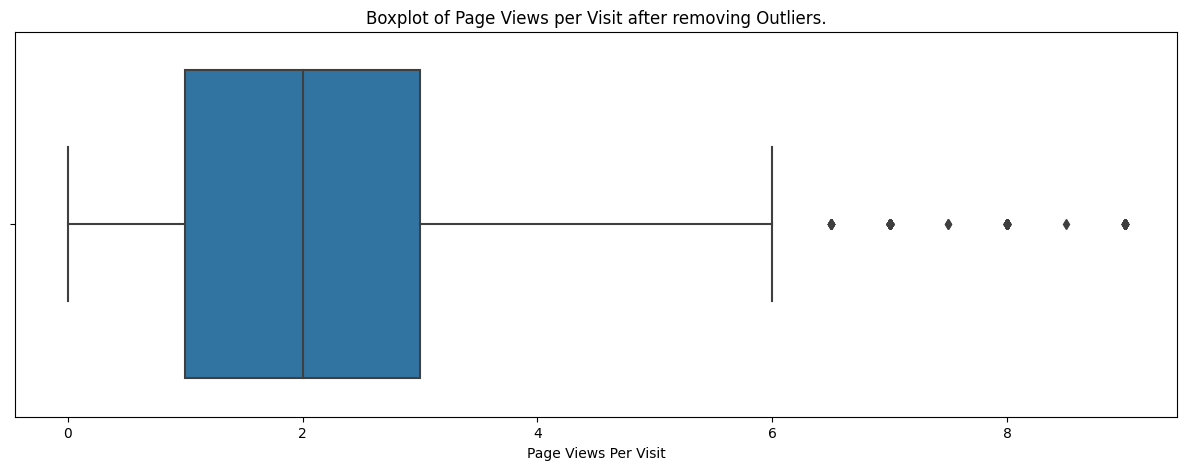

In [104]:
plt.figure(figsize=(15,5))

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[(df['Page Views Per Visit'] <= Q3)]

Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[(df['Page Views Per Visit'] >= Q1)]

sns.boxplot(x = df['Page Views Per Visit'])
plt.title("Boxplot of Page Views per Visit after removing Outliers.")
plt.show()

In [105]:
# Checking the shape of the dataset.
df.shape

(8953, 14)

In [106]:
print(f" After removing outliers we have dropped the {9020 - 8953} datapoints.")

 After removing outliers we have dropped the 67 datapoints.


In [107]:
# Let's check for nan values once again
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

We can conform that there are no NAN values present in the data. 

# Model Preparation

### Step 1 - Creating Dummy Variables

In [108]:
# First we need to get a list of categorical columns present in the dataset.

categorical_vals = df.select_dtypes(include = ['object']).columns
categorical_vals

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Prining Categorical Variables to know if Mapping is required.

In [109]:
for i in categorical_vals:
    print(i)
    print(df[i].value_counts())
    print(" - - - - - - - - - - - - -- --  - - - - ")

Lead Origin
Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64
 - - - - - - - - - - - - -- --  - - - - 
Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: Lead Source, dtype: int64
 - - - - - - - - - - - - -- --  - - - - 
Do Not Email
No     8256
Yes     697
Name: Do Not Email, dtype: int64
 - - - - - - - - - - - - -- --  - - - - 
Last Activity
Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        187
Form Submitted on Website     114
Name: Last Activity, 

We can see that `A free copy of Mastering The Interview` and `Do Not Email` and converted to 1's and 0's.

In [110]:
map_var = ['A free copy of Mastering The Interview', 'Do Not Email']

# Defining the map function.
def binary_mapping(x):
    return x.map({"Yes": 1, "No": 0})

# Appliying the function to the variable list
df[map_var] = df[map_var].apply(binary_mapping)

In [111]:
# Checking if the mapping has gone through
df[map_var].head()

,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


Now Adding the dummy variables to the data for `Lead Origin`, `What is your current occupation` and `City`.

In [112]:
# getting dummies and dropping the first columns and adding the result to the original dataframe.

dummy = pd.get_dummies(df[['Lead Origin', "What is your current occupation", "City"]], drop_first = True)

df = pd.concat([df, dummy], axis = 1)

Adding Dummy Variables to the data for Specialization.

In [113]:
dummy = pd.get_dummies(df['Specialization'], prefix = "Specialization")
dummy = dummy.drop(["Specialization_Not Specified"], axis = 1)
df = pd.concat([df, dummy], axis = 1)

Adding Dummy Variables to the data for Lead Source

In [114]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis = 1)
df = pd.concat([df, dummy], axis = 1)

Adding Dummy Variables to the data for Last Activity

In [115]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], axis = 1)
df = pd.concat([df, dummy], axis = 1)

Adding Dummy Variables to the data for Last Notable Activity

In [116]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_Activity'], axis = 1)
df = pd.concat([df, dummy], axis = 1)

Adding Dummy Variables to the data for Tags

In [117]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], axis = 1)
df = pd.concat([df, dummy], axis = 1)

Since we have created dummy variables for all the categorical variables, we can remove the original columns from the data

In [118]:
# dropping the original columns after dummy variable creation
df.drop(categorical_vals, axis = 1, inplace = True)

In [119]:
# Checking the data to see if the applied eda is clear
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [120]:
# Let's check if we have any categorical variables presetn in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 6   Lead Origin_Lead Import                               8953 non-null   uint8  
 7   What is your current occupation_Housewife             8953 non-null   uint8  
 8   What is your current occupation_Other                 8953

Since there are no variables present, we can go ahead in creating the model.

## Model Building: Logistic Regression

Splitting the data into Training and Testing Set- For this we need to import Train Test Split from Sklearn.

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
# Tagrget Variable
y = df['Converted'] 

# Independent Variable
X = df.drop(['Converted'], axis = 1)

In [123]:
# Splitting the data int train and test data at 70/30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [124]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,5.0,1490,5.00,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4696,3.0,457,3.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3274,4.0,126,2.00,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2164,2.0,393,2.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1667,4.0,1167,1.33,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [125]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,5.0,311,2.5,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
984,3.0,183,3.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8135,2.0,913,2.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6915,4.0,141,2.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,3.0,252,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [126]:
y_train.head()

9196    1
4696    0
3274    0
2164    0
1667    1
Name: Converted, dtype: int64

In [127]:
y_test.head()

7681    0
984     0
8135    0
6915    0
2712    1
Name: Converted, dtype: int64

In [128]:
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}")

X_train Shape: (6267, 59), y_train Shape: (6267,)
X_test Shape: (2686, 59), y_test Shape: (2686,)


Scalling of Data using Standard Scaler from Sklearn

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()

# Selecting numerical cols for scaling 

numerical_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Building Logistic Regression using Stats Model & RFE:

In [131]:
# importing Statsmodels
import statsmodels.api as sm

# importing LR model
from sklearn.linear_model import LogisticRegression

In [132]:
logmi = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logmi.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6207
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1176.2
Date:                Tue, 28 May 2024   Deviance:                       2352.4
Time:                        00:06:37   Pearson chi2:                 8.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6145
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8625      2.555      0.338      0.736      -4.146       5.870
TotalVisits                                              0.2218      0.077      2.877      0.004       0.071       0.373
Total Time Spent on Website                              1.0829      0.064     16.957      0.000       0.958       1.208
Page Views Per Visit                                    -0.2776      0.096     -2.882      0.004      -0.466      -0.089
Lead Origin_Landing Page Submission                     -0.7301      0.241     -3.032      0.002      -1.202      -0.258
Lead Origin_Lead Add Form                                1.0679      1.218      0.877      0.381      -1.319       3.455
Lead Origin_Lead Import                                 23.0111   2.48e+04      0.001      0.999   -4.87e+04    4.87e+04
What is your current occupation_Housewife               19.3071   1.97e+04      0.001      0.999   -3.85e+04    3.86e+04
What is your current occupation_Other                   -0.3074      2.637     -0.117      0.907      -5.476       4.861
What is your current occupation_Student                  0.2529      1.794      0.141      0.888      -3.264       3.770
What is your current occupation_Unemployed              -0.1341      1.691     -0.079      0.937      -3.448       3.180
What is your current occupation_Working Professional     0.8513      1.735      0.491      0.624      -2.549       4.251
City_Other Cities                                        0.2688      0.231      1.161      0.246      -0.185       0.722
City_Other Cities of Maharashtra                        -0.0866      0.291     -0.298      0.766      -0.656       0.483
City_Other Metro Cities                                  0.0087      0.313      0.028      0.978      -0.605       0.622
City_Thane & Outskirts                                  -0.0686      0.229     -0.299      0.765      -0.518       0.381
City_Tier II Cities                                      0.3391      0.632      0.537      0.591      -0.899       1.577
Specialization_Banking, Investment And Insurance         0.5488      0.373      1.471      0.141      -0.183       1.280
Specialization_Business Administration                  -0.0033      0.352     -0.009      0.993      -0.693       0.687
Specialization_E-Business                                0.1643      0.674      0.244      0.807      -1.156       1.484
Specialization_E-COMMERCE                                0.3565      0.513      0.695      0.487      -0.649       1.362
Specialization_International Business                   -0.1177      0.473     -0.249      0.803      -1.044       0.808
Specialization_Management_Specializations                0

In the above table, our key focous area is just the different coefficient and their respective p-values. As we can, there are many variables whose p-values are higher, implying that the variable is statistically insignificant. So we need to eliminate some of the variables in orede to build a better model.

To eliminate a few features we will use Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e manually eliminating feature based on observing the p-values and VIFs).

In [133]:
# Creating an instance of Logistic Regression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
# running RFE With 15 Variables
rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [134]:
# Printing the output 
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True])

In [135]:
# Combining the data to understand the full RFE data
zipped_data = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
zipped_data

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('What is your current occupation_Housewife', False, 30),
 ('What is your current occupation_Other', False, 36),
 ('What is your current occupation_Student', False, 24),
 ('What is your current occupation_Unemployed', False, 18),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 39),
 ('City_Other Metro Cities', False, 42),
 ('City_Thane & Outskirts', False, 40),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 15),
 ('Specialization_Business Administration', False, 41),
 ('Specialization_E-Business', False, 37),
 ('Specialization_E-COMMERCE', False, 23),
 ('Specialization_International Business', F

In [136]:
# Checking the rfe supported columns
rfe_suport_col = X_train.columns[rfe.support_]
rfe_suport_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [137]:
# listing the columns which are not supported by RFE
rfe_unsuport_col = X_train.columns[~rfe.support_]
rfe_unsuport_col

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

### From here we can start building models for further analysis.

In [138]:
# Model building

X_train_sm = sm.add_constant(X_train[rfe_suport_col])
log_model_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Tue, 28 May 2024   Deviance:                       2509.3
Time:                        00:06:46   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6048
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

While evaluating the RFE, we should remove the variable that has highest p-value.
We can see that in `Lead Source_Referral Sites` has the highers p-value and that should be dropped for further analysis.

In [139]:
# Dropping column with higher p-value.
rfe_suport_col = rfe_suport_col.drop(['Lead Source_Referral Sites'],1)

In [140]:
# Model 2 after removing the Lead Source_Referral Sites

X_train_sm = sm.add_constant(X_train[rfe_suport_col])
log_model_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Tue, 28 May 2024   Deviance:                       2510.7
Time:                        00:06:46   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6047
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

Now we can see that all the variables have their the p-values equal to 0. So we can check for the VIF (Variance Inflation Factor) for checking if there are any correlation between the variables.

In [141]:
# Importing VIF from Stasmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
# Creating the dataframe that will contain the name of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_suport_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_suport_col].values, i) for i in range(X_train[rfe_suport_col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


From analysis we can see that there is a high correlation between two variables `Last Notable Activity_SMS Sent` and `Last Activity_SMS Sent`, so we need to drop the variables one by one based on their values.

In [143]:
# Removing variable with highest VIF values.
rfe_suport_col = rfe_suport_col.drop("Last Notable Activity_SMS Sent",1)

In [144]:
# Logistic Model 3
X_train_sm = sm.add_constant(X_train[rfe_suport_col])
log_model_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Tue, 28 May 2024   Deviance:                       2526.6
Time:                        00:06:47   Pearson chi2:                 8.51e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6037
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
=================================================================================================================
"""

In [145]:
# Creating the dataframe that will contain the name of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_suport_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_suport_col].values, i) for i in range(X_train[rfe_suport_col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


Since all the values are below 5, we can go ahead to interpret Probabilities, Lead Score and Prediction on Train Data.

In [146]:
# Predicting the 10 values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [147]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [148]:
# Converting the predicted variable into a dataframe
y_train_pred_final = pd.DataFrame({"Converted": y_train.values, "Converted_prob": y_train_pred})

# Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [149]:
# Predicting the output and to see how the model performs
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


In [150]:
# Importing mertics from Sklearn
from sklearn import metrics

In [151]:
# Now we can check how the model performs using the Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3693,  189],
       [ 281, 2104]], dtype=int64)

In [152]:
# Let's check the overall accuracy of the model.
print(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted) * 100,2))

92.5


In [153]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [154]:
print("True Positive is: ", TP)
print("True Negative is: ", TN)
print("False Positive is: ", FP)
print("False Negative is: ", FN)

True Positive is:  2104
True Negative is:  3693
False Positive is:  189
False Negative is:  281


#### Here we can see that we have got a very good prediction with the model.

##### Now we need to check on the Sensitivity and Specificity

In [155]:
# Sensitivity
sensitivity = round(TP / float(TP + FN) * 100, 2)
print(f"Sensitivity is: {sensitivity}%")

Sensitivity is: 88.22%


As compared to the accuracy of our model i.e `92.5%` our Sensitivity turns out to be low i.e `88.22%`

In [156]:
# Specificity 
specificity = round(TN / float(TN + FP) * 100, 2)
print(f"Specificity is: {specificity}%")

Specificity is: 95.13%


As compared to the accuracy of our model i.e `92.5%` and Sensitivity turns out to be low i.e`88.22%` but the Specificity of our model is higher than the accuracy i.e `95.13%`

So our model seems to have the higher accuracy and higher specificity but low sensitivity and since we are interested in identifying the leads which might get Converted, we clearly need to deal with this.

In [157]:
# Claculating the False Positive
# In technical terms, the false positive rate is defined as the probability of falsely rejecting the null hypothesis.
print(FP / float(TN + FP))

0.04868624420401855


In [158]:
# Positive predicitve value
print(TP / float(TP + FP))

0.9175752289576974


In [159]:
# Negative predictive value
print(TN / float(TN + FN))

0.9292903875188727


From above analysis, its clear that we have a very good predicitve model.

### Plotting the ROC Curve.


In [160]:
# Defining the Function to plot ROC Curve

def draw_roc (actual, probs):
    """fpr --> False Positive Rate, tpr --> True Positive Rate"""
    fpr, trp, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label = "ROC Curve (area = %0.2f)" % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0,1.0])
    plt.ylim([0,1.05])
    
    plt.xlabel("False Positive Rate or [1 - True Nagative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operation characheristic Curve")
    
    plt.legend(loc = 'lower right')
    plt.show()
    
    return None

In [161]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)
print(fpr, tpr, thresholds)

[0.        0.        0.        ... 0.9992272 0.9994848 1.       ] [0.00000000e+00 4.19287212e-04 2.09643606e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00] [1.99999356e+00 9.99993561e-01 9.99986254e-01 ... 4.13779388e-04
 4.11101187e-04 4.02516124e-04]


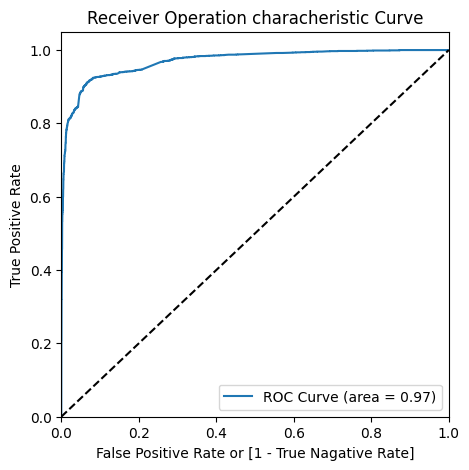

In [162]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Generally, the ROC Curve should be a value close to 1 to be good model. Here we are getting a good value of `0.97` indicating a good predictive model.

### Finding Optimal Cutoff Points

In [163]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [164]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.971488  0.720762
0.2   0.2  0.901069  0.931237  0.882535
0.3   0.3  0.922930  0.916981  0.926584
0.4   0.4  0.925802  0.901468  0.940752
0.5   0.5  0.925004  0.882180  0.951314
0.6   0.6  0.915909  0.828092  0.969861
0.7   0.7  0.916228  0.810063  0.981453
0.8   0.8  0.906335  0.774843  0.987120
0.9   0.9  0.887027  0.718239  0.990726


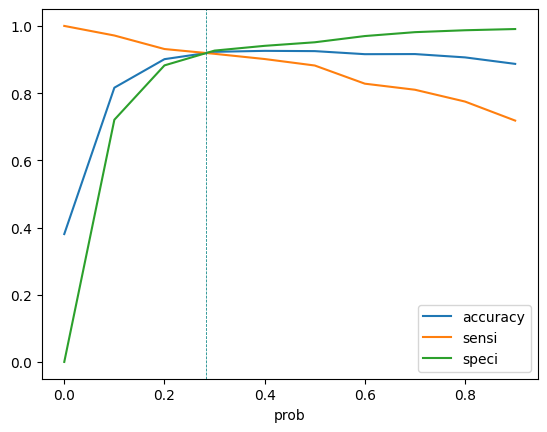

In [165]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.283, color='teal',linewidth = 0.55, linestyle='--')
plt.show()

In [166]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.283 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,1
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [167]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283149,9196,1,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9211744056167225

In [169]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3578,  304],
       [ 190, 2195]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9203354297693921

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.9216898505924781

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. 

In [173]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0783101494075219


In [174]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8783513405362144


In [175]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9495753715498938


In [176]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3578,  304],
       [ 190, 2195]], dtype=int64)

In [177]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8783513405362144

In [178]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9203354297693921

In [179]:
from sklearn.metrics import precision_score, recall_score

In [180]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8783513405362144

In [181]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9203354297693921

In [182]:
from sklearn.metrics import precision_recall_curve

In [183]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

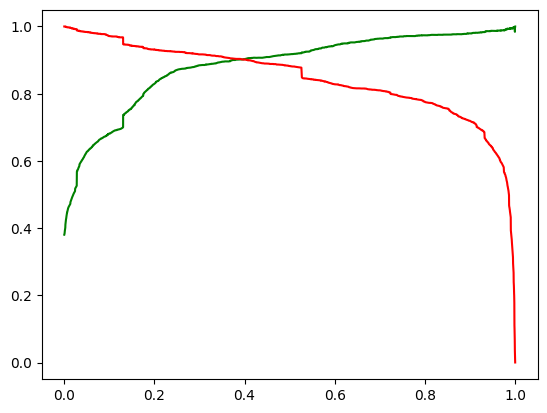

In [184]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [185]:
#scaling test set

num_cols = X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [186]:
col = rfe_suport_col

In [187]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,1,0,0,0,0,0,0,1,0
984,-0.550262,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.812462,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,1


In [188]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET

In [189]:
y_test_pred = res.predict(X_test_sm)

In [190]:
y_test_pred[:10]

7681    0.024819
984     0.025692
8135    0.686054
6915    0.005880
2712    0.953208
244     0.002398
4698    0.014697
8287    0.027549
6791    0.981608
8970    0.005703
dtype: float64

In [191]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [192]:
# Let's see the head
y_pred_1.head()

,0
7681,0.024819
984,0.025692
8135,0.686054
6915,0.005880
2712,0.953208


In [193]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [194]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [195]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [196]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [197]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [198]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [199]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [200]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024819,2
1,984,0,0.025692,3
2,8135,0,0.686054,69
3,6915,0,0.005880,1
4,2712,1,0.953208,95


In [201]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [202]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024819,2,0
1,984,0,0.025692,3,0
2,8135,0,0.686054,69,1
3,6915,0,0.005880,1,0
4,2712,1,0.953208,95,1


In [203]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9277736411020104

In [204]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1563,  113],
       [  81,  929]], dtype=int64)

In [205]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [206]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9198019801980198

In [207]:
# Let us calculate specificity
TN / float(TN+FP)

0.9325775656324582

In [208]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8915547024952015

In [209]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9198019801980198

### Observation:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

## Final Observation:

Let us compare the values obtained for Train & Test:

### <u> Train Data: </u>
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

### <u> Test Data: </u>
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

### To save the trained logistic regression model (log_model_3) to a file, you can use Python's pickle module

In [210]:
import pickle

# Save the trained model to a file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(log_model_3, file)